# **1 - Michelle Corda (229002)**

# **6 - Abisha Nadar (229007)**

# **29 - Namrata Singh (229040)**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("spam.csv",encoding="ISO-8859-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.size

27860

# **DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dropelements = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']

In [ ]:
df= df.drop(dropelements, axis= 1)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# renaming the columns
df.rename(columns ={'v1':'target','v2':'text'},inplace = True)

In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep ='first',inplace= True)

# **FEATURE ENGINEERING AND EDA**

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# ENCODING
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target =le.fit_transform(df['target'])
df['target'] = Target

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

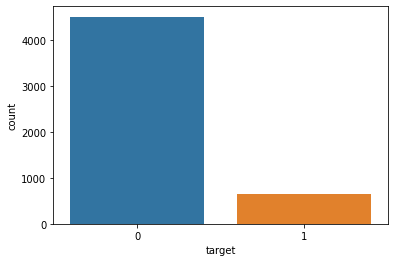

In [ ]:
import seaborn as sns  # 0: ham, 1:spam
sns.countplot(x=df['target'])

<function matplotlib.pyplot.show(close=None, block=None)>

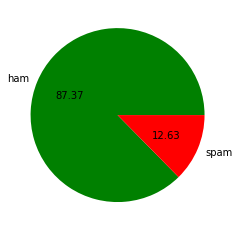

In [ ]:
import matplotlib.pyplot as plt
color =['green','red']
plt.pie(df['target'].value_counts(),labels= ['ham','spam'],colors = color,autopct="%0.2f")
plt.show

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['no_of_characters'] = df['text'].apply(len)
df['no_of_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: no_of_characters, Length: 5169, dtype: int64

In [ ]:
df['no_of_words']= df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df['no_of_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: no_of_words, Length: 5169, dtype: int64

In [ ]:
df['no_of_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df['no_of_sentence']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: no_of_sentence, Length: 5169, dtype: int64

In [ ]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['no_of_characters','no_of_words',	'no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
df[df['target']==0][['no_of_characters','no_of_words',	'no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
df[df['target']==1][['no_of_characters','no_of_words',	'no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:>

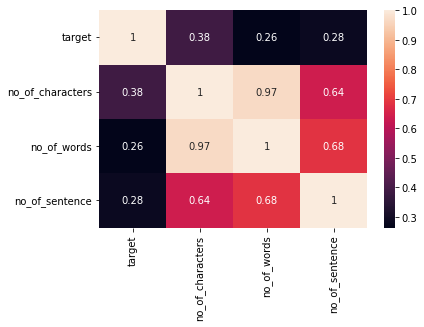

In [ ]:
sns.heatmap(df.corr(), annot = True)

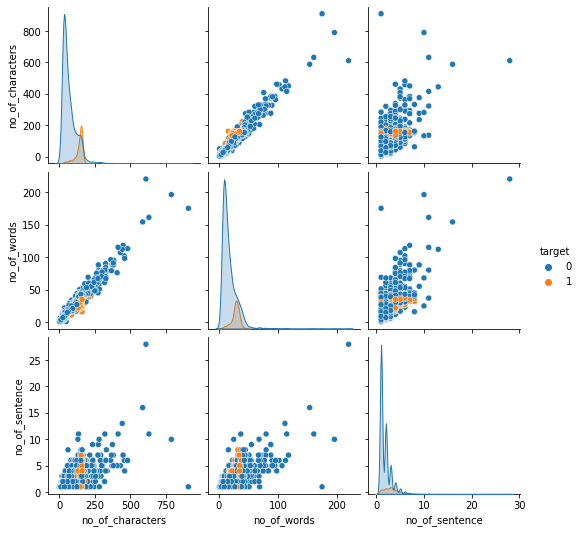

In [ ]:
sns.pairplot(df, hue= 'target')

<Figure size 8280x7776 with 0 Axes>

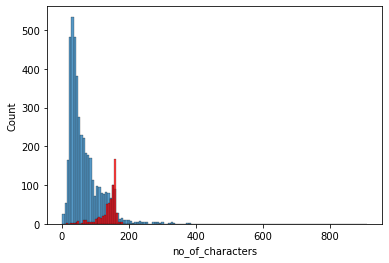

<Figure size 8280x7776 with 0 Axes>

In [ ]:
sns.histplot(df[df['target']==0]['no_of_characters'])
sns.histplot(df[df['target']==1]['no_of_characters'],color='red')
plt.figure(figsize=(115,108))

# **Text Preprocessing**

1) Lower Case

2) Tokeniztion

3) Removing Special Characters

4) Removing Stop words and punctuation

5) Stemming

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def cleaned_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for words in text :
        if words.isalnum():
            y.append(words)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation :
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [ ]:
df['cleaned_text']= df['text'].apply(cleaned_text)
df['cleaned_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: cleaned_text, Length: 5169, dtype: object

In [ ]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentence,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width= 500, height= 500,min_font_size= 10, background_color= 'white')

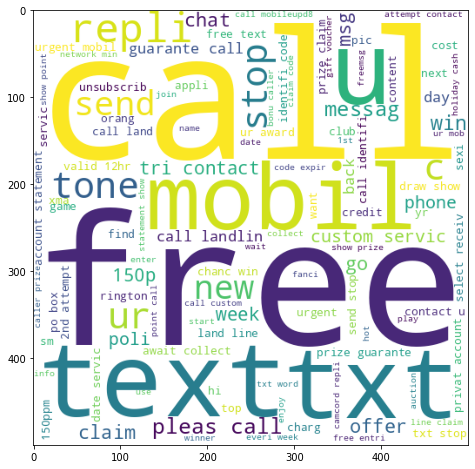

In [ ]:
#spam
spam_wc= wc.generate(df[df['target']==1]['cleaned_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

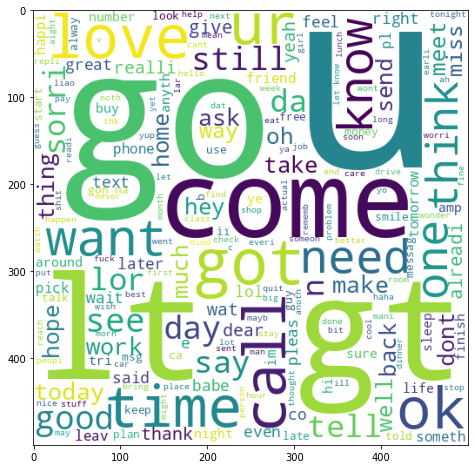

In [ ]:
#ham
ham_wc= wc.generate(df[df['target']==0]['cleaned_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [ ]:
from collections import Counter

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['cleaned_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


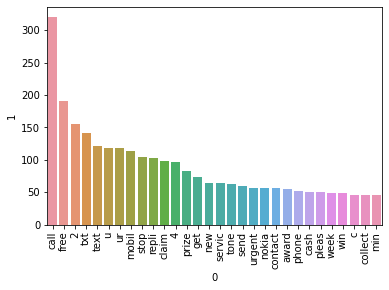

In [ ]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['cleaned_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


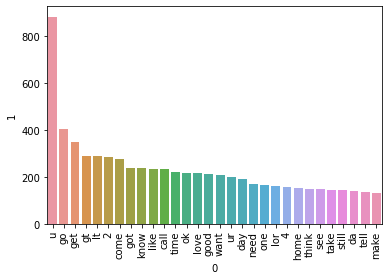

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# **MODEL BUILDING**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer() 
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['cleaned_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y= df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 102)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8588007736943907
[[780 129]
 [ 17 108]]
0.45569620253164556


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[909   0]
 [ 25 100]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[905   4]
 [ 18 107]]
0.963963963963964


In [ ]:
# tfidf --> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
svc = SVC(kernel = 'sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state = 101)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train,X_test, y_test):
    clf.fit(X_train,y_train)
    y_predict= clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    return accuracy,precision    

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9807692307692307)

In [ ]:
accuracyy_score= []
precisionn_score= []

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf,X_train, y_train,X_test, y_test)
    accuracyy_score.append(accuracy)
    precisionn_score.append(precision)  

In [ ]:
performance_df= pd.DataFrame({'Algorithms': clfs.keys(),'Accuracy':accuracyy_score,'Precision':precisionn_score }).sort_values('Precision',ascending = False)
performance_df

,Algorithms,Accuracy,Precision
1,KN,0.922631,1.000000
2,NB,0.975822,1.000000
5,RF,0.977756,1.000000
0,SVC,0.975822,0.980769
4,LR,0.962282,0.957447
3,DT,0.941006,0.872093


In [ ]:
performance_df1 = pd.melt(performance_df,id_vars = 'Algorithms')

In [ ]:
performance_df1

,Algorithms,variable,value
0,KN,Accuracy,0.922631
1,NB,Accuracy,0.975822
2,RF,Accuracy,0.977756
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.962282
5,DT,Accuracy,0.941006
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,1.000000
9,SVC,Precision,0.980769


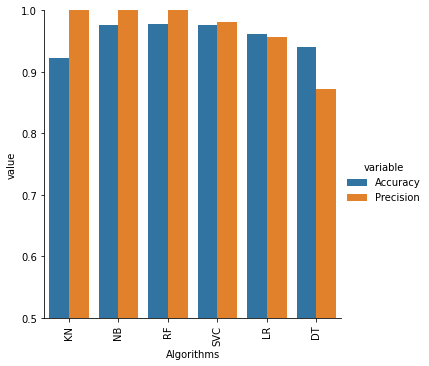

In [ ]:
sns.catplot(x = 'Algorithms', y ='value',
            hue = 'variable',data = performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithms': clfs.keys(),'Accuracy_max_ft_3000':accuracyy_score,'Precision_max_ft_3000':precisionn_score}).sort_values('Precision_max_ft_3000',ascending = False)
temp_df

,Algorithms,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.922631,1.000000
2,NB,0.975822,1.000000
5,RF,0.977756,1.000000
0,SVC,0.975822,0.980769
4,LR,0.962282,0.957447
3,DT,0.941006,0.872093


In [ ]:
performance_df.merge(temp_df,on='Algorithms')

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.922631,1.000000,0.922631,1.000000
1,NB,0.975822,1.000000,0.975822,1.000000
2,RF,0.977756,1.000000,0.977756,1.000000
3,SVC,0.975822,0.980769,0.975822,0.980769
4,LR,0.962282,0.957447,0.962282,0.957447
5,DT,0.941006,0.872093,0.941006,0.872093


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))